# Avvistamenti per giorno dell'anno

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/AvvistamentiPerGiorno'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [5]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [6]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

from datetime import date, timedelta

def days_in_year(dt):
    start = date(dt.year, 1, 1)
    end = date(dt.year, dt.month, dt.day)
    return (end - start).days

days_since_year = []
for iloc, dt in data['datetime'].iteritems():
    days_since_year.append(days_in_year(dt))
data['DaysSinceYear'] = pd.Series(days_since_year, index=data.index)

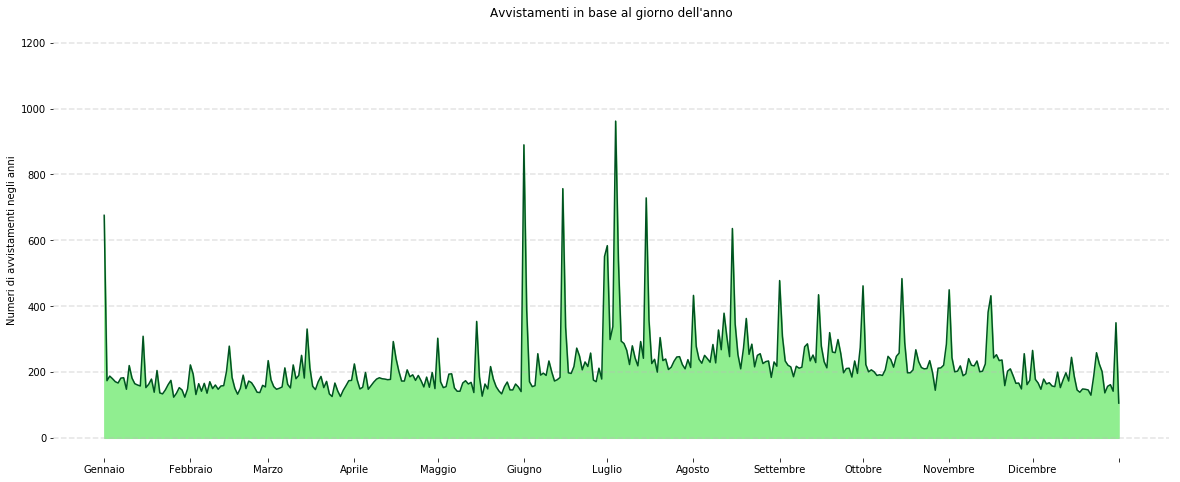

In [7]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

DARK_COLOR = '#005221'
LIGHT_COLOR = '#90ee90'

counts = data['DaysSinceYear'].value_counts().sort_index()

ax.plot(counts.index, counts.values, color=DARK_COLOR)

days_for_month = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
ax.set_xticks(days_for_month)
ax.set_xticklabels([
    'Gennaio', 'Febbraio', 'Marzo', 'Aprile', 
    'Maggio', 'Giugno', 'Luglio', 'Agosto', 
    'Settembre', 'Ottobre', 'Novembre', 'Dicembre'
])

ax.set_title('Avvistamenti in base al giorno dell\'anno')
ax.set_ylabel('Numeri di avvistamenti negli anni')

for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)

vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#bbbbbb', zorder=1)
        
ax.fill_between(counts.index, 0, counts.values, color=LIGHT_COLOR)

plt.savefig(f'{OUT_FOLDER}/LineChart.png')
plt.show()